In [1]:
import os 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('/home/melissa/PROJECT_DIRECTORIES/GRIN2B/scripts')
%run plotting.py

# Palette Color Variations

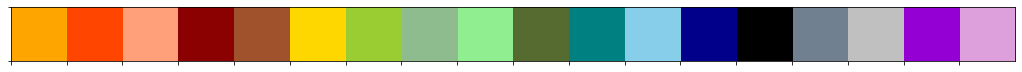

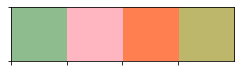

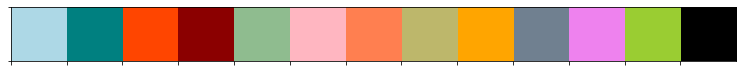

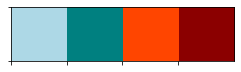

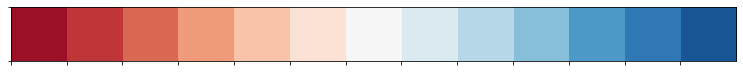

In [2]:
wt_id_colors = ['orange', 'orangered','lightsalmon','darkred','sienna', 'gold','yellowgreen','darkseagreen','lightgreen','darkolivegreen',
         'teal', 'skyblue', 'darkblue','black', 'slategrey', 'silver', 'darkviolet', 'plum']
sns.palplot(wt_id_colors)
royal = ['darkseagreen', 'lightpink', 'coral', 'darkkhaki']
darjeeling = ['orange', 'lightgreen', 'skyblue', 'plum']
bright = ['lightblue', 'teal', 'orangered', 'darkred']
channels = ['lightblue', 'teal', 'orangered', 'darkred', 'darkseagreen', 
                 'lightpink', 'coral', 'darkkhaki', 'orange', 'slategrey', 'violet', 'yellowgreen', 'black']
sns.palplot(royal)
sns.palplot(channels[0:13])
sns.palplot(bright)
diverging_colors = sns.color_palette("RdBu", 13)
sns.palplot(diverging_colors)

colors_dict= {0 : 'teal', 2 :'orangered', 3 : 'orangered', 4: 'orangered', 5: 'darkred',
              6 : 'darkred', 7 : 'teal', 8: 'darkred', 9:'darkred', 10: 'teal',
              11: 'orangered', 12: 'orangered', 13: 'orangered', 15 : 'teal'}

# IDs for sleepstages excluding seizure epochs

In [3]:
GRIN_wt_IDs = ['378','382', '383', '401','402','404', '430','140','132',
               '238','240','362','363','365','366','369','371','375']
len(GRIN_wt_IDs)

18

In [4]:
GRIN_het_IDs = ['131', '130', '129', '228', '227', '229', '373', '138', '137',
                '139','236', '237', '239', '241', '364', '367', '368', '424',
                '433']
len(GRIN_het_IDs)

19

In [5]:
br_animal_IDs = ['378', '382', '383', '401', '402', '404','424', '430','433',
                '140', '129', '130', '131', '132', '137','138', '139', '227',
                '228', '229', '236', '237', '238', '239', '240', '241', '362',
                '363', '364', '365', '366', '367', '368', '369', '371', '373', '375'] 
len(br_animal_IDs)

37

In [6]:
wt_list_to_plot = []

for id in range(0, len(GRIN_wt_IDs)-1, 2):
    wt_list_to_plot.append([int(GRIN_wt_IDs[id]), int(GRIN_wt_IDs[id + 1])])

In [7]:
het_list_to_plot = []

for id in range(0, len(GRIN_het_IDs)-1, 2):
    het_list_to_plot.append([int(GRIN_het_IDs[id]), int(GRIN_het_IDs[id + 1])])

In [9]:
os.chdir('/home/melissa/RESULTS/GRIN2B/Power/REM/')
rem = pd.read_csv('baseline_REM_power.csv')
os.chdir('/home/melissa/RESULTS/GRIN2B/Power/NREM/')        
non_rem = pd.read_csv('baseline_nonREM_power.csv')

In [42]:
non_rem

,Unnamed: 0,Animal_ID,Channel,Brainstate,Frequency,Power
0,0,129,0,1,0.0,1.681574e+03
1,1,129,0,1,0.2,3.643028e+03
2,2,129,0,1,0.4,6.164514e+02
3,3,129,0,1,0.6,9.775533e+01
4,4,129,0,1,0.8,1.132963e+02
...,...,...,...,...,...,...
324781,324781,433,15,1,124.4,1.296294e-10
324782,324782,433,15,1,124.6,1.289230e-10
324783,324783,433,15,1,124.8,1.284201e-10
324784,324784,433,15,1,125.0,1.281192e-10


In [43]:
ids = non_rem['Animal_ID']
ids

0         129
1         129
2         129
3         129
4         129
         ... 
324781    433
324782    433
324783    433
324784    433
324785    433
Name: Animal_ID, Length: 324786, dtype: int64

In [44]:
## add genotype 
genotype = []
for anim_id in ids:
    if str(anim_id) in GRIN_het_IDs:
        genotype.append('GRIN2B')
    else:
        genotype.append('WT')

In [45]:
non_rem['Genotype'] = genotype

In [38]:
plot_list = ['somatosensory', 'motor', 'visual']
label_list = [0,1, 2]

for plot, label in zip(plot_list, label_list):
    print(plot_list[label])

somatosensory
motor
visual


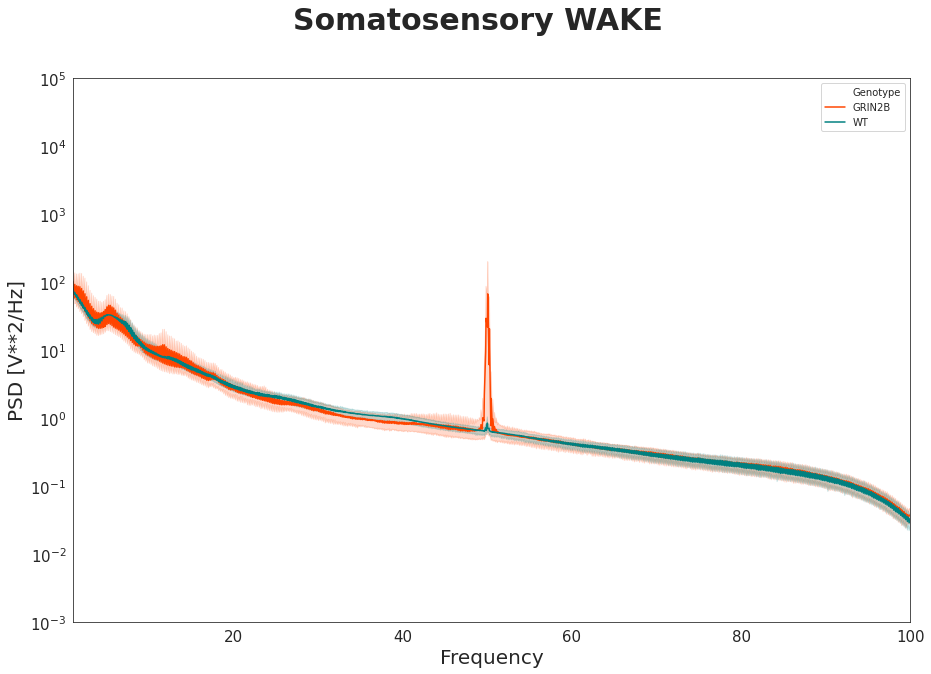

<Figure size 432x288 with 0 Axes>

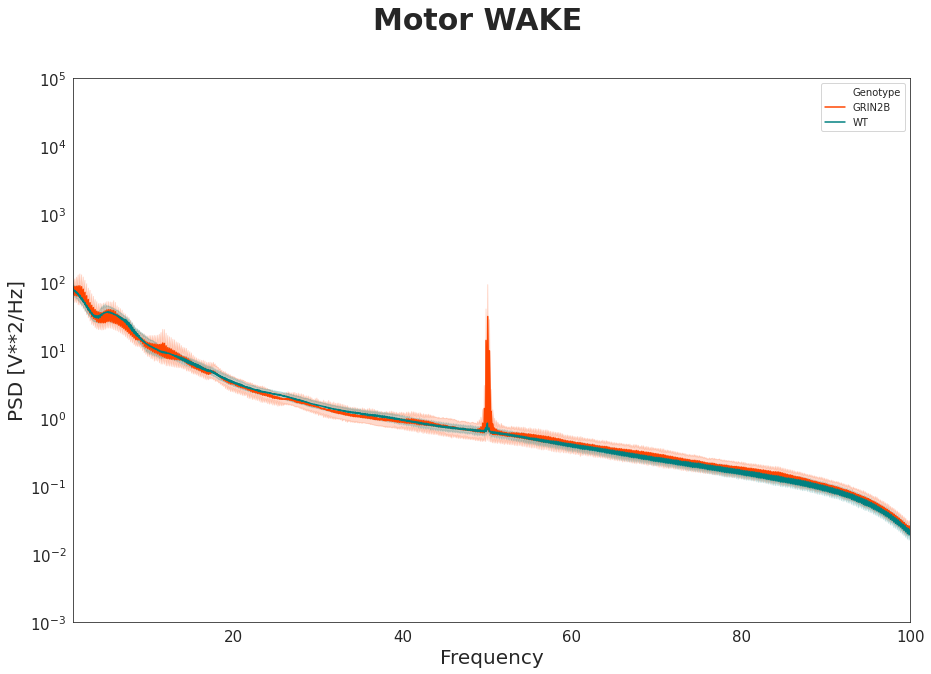

<Figure size 432x288 with 0 Axes>

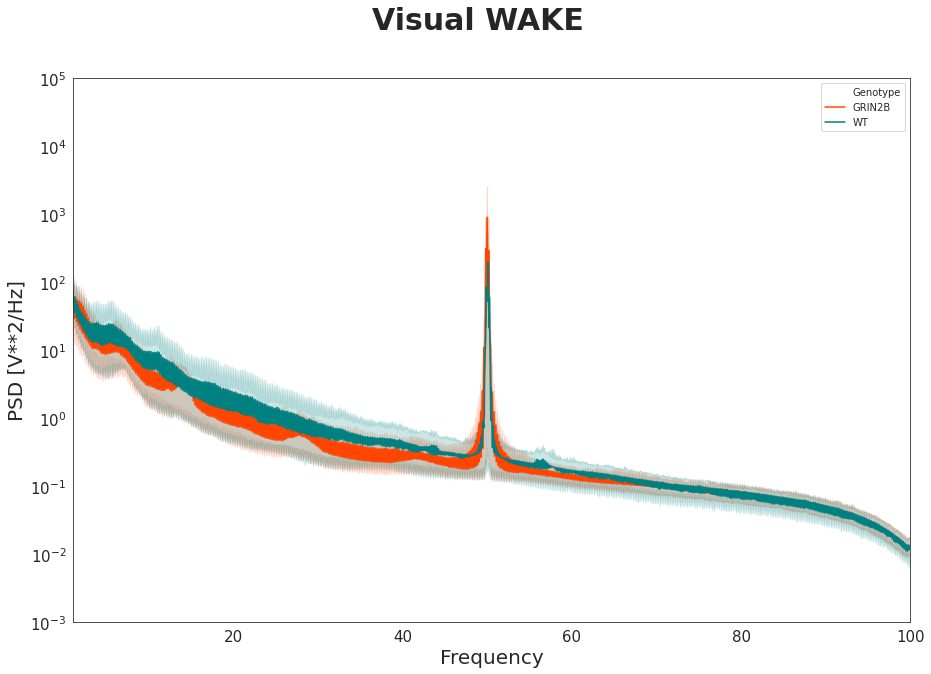

<Figure size 432x288 with 0 Axes>

In [138]:
save_path = '/home/melissa/RESULTS/GRIN2B/Power/WAKE/harmonics_algo/test_5/plots/'
plot_by_channel_region(harmonics_df, sleepstage = 'WAKE', save_path = save_path)

[131, 130]
[129, 228]
[227, 229]
[373, 138]
[137, 139]
[236, 237]
[239, 241]
[364, 367]
[368, 424]


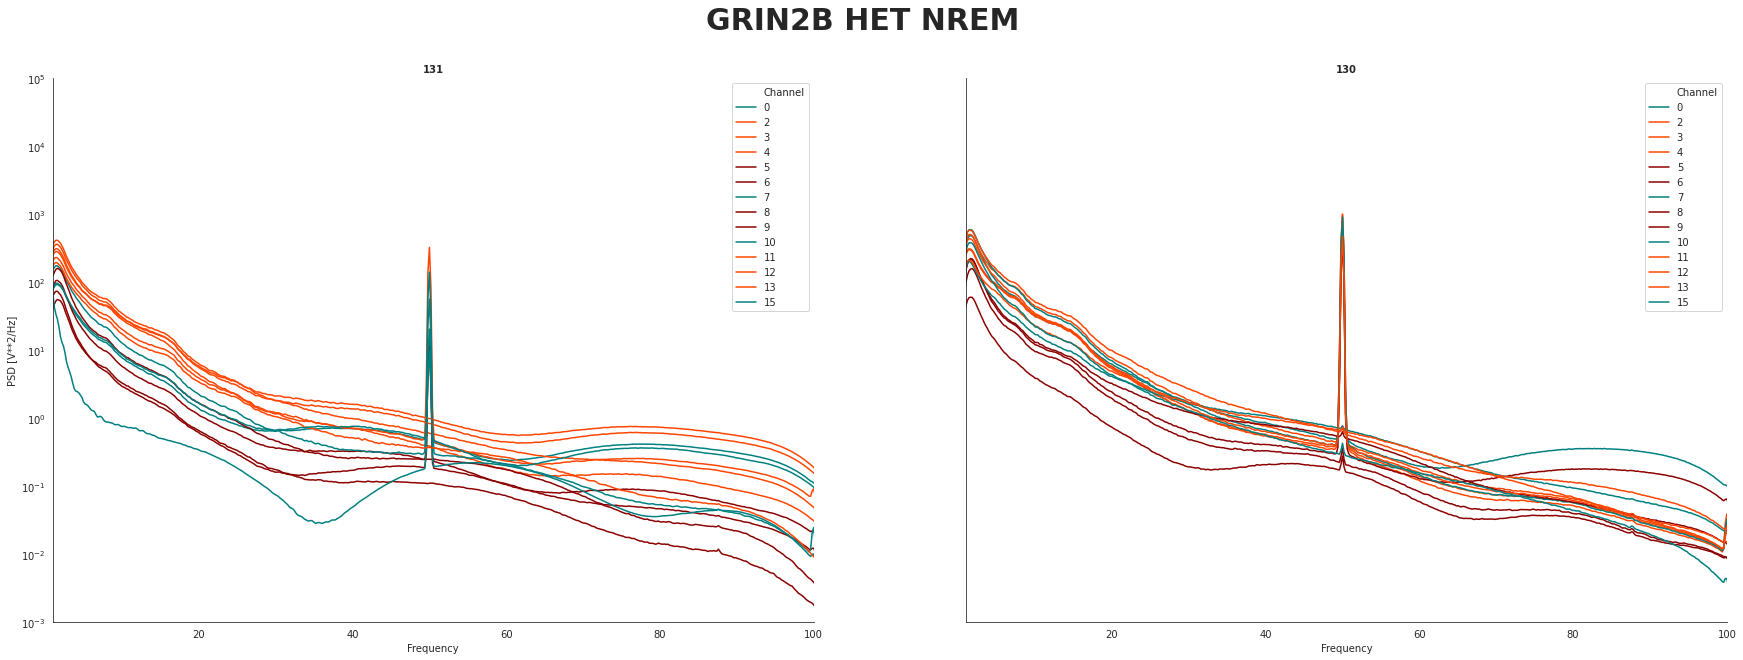

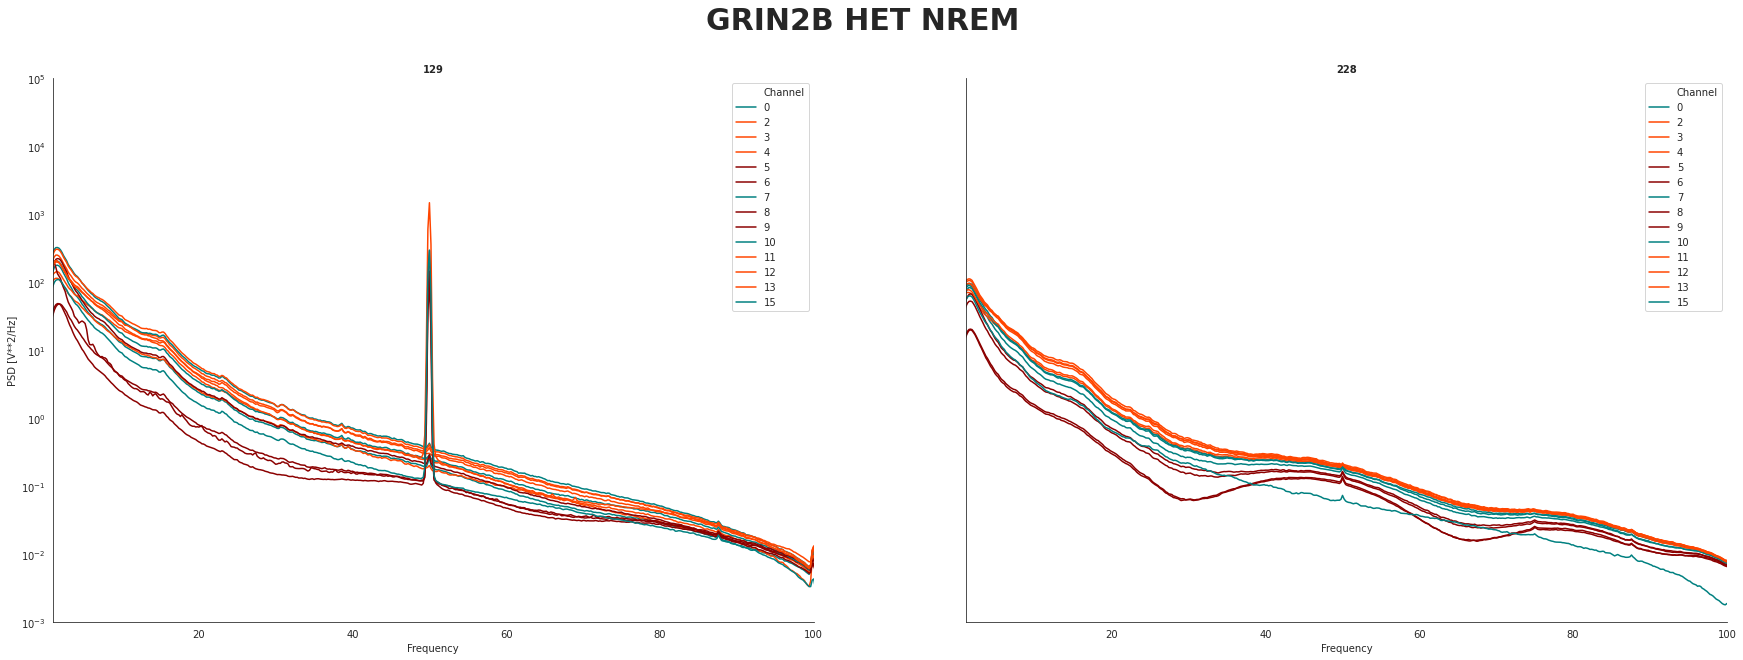

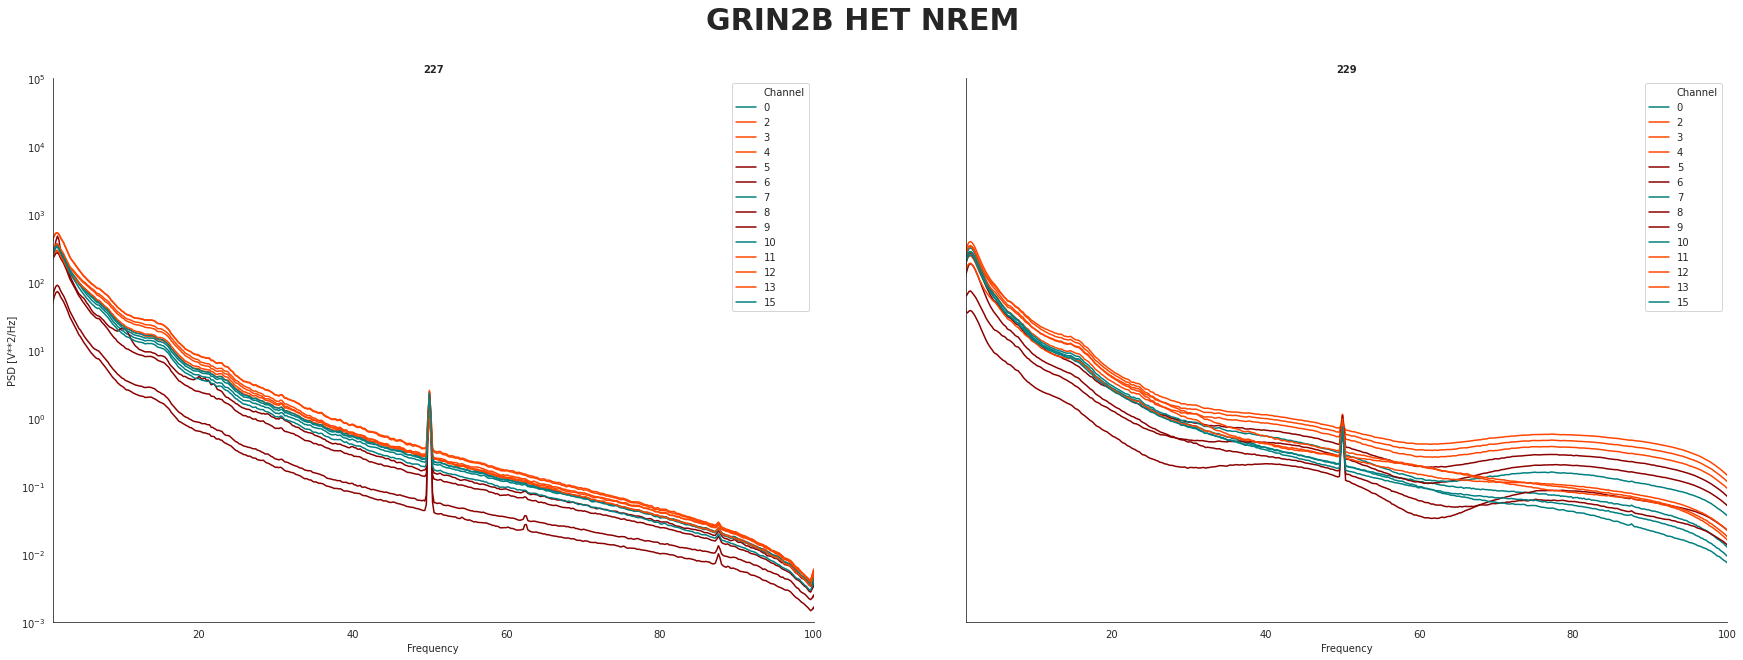

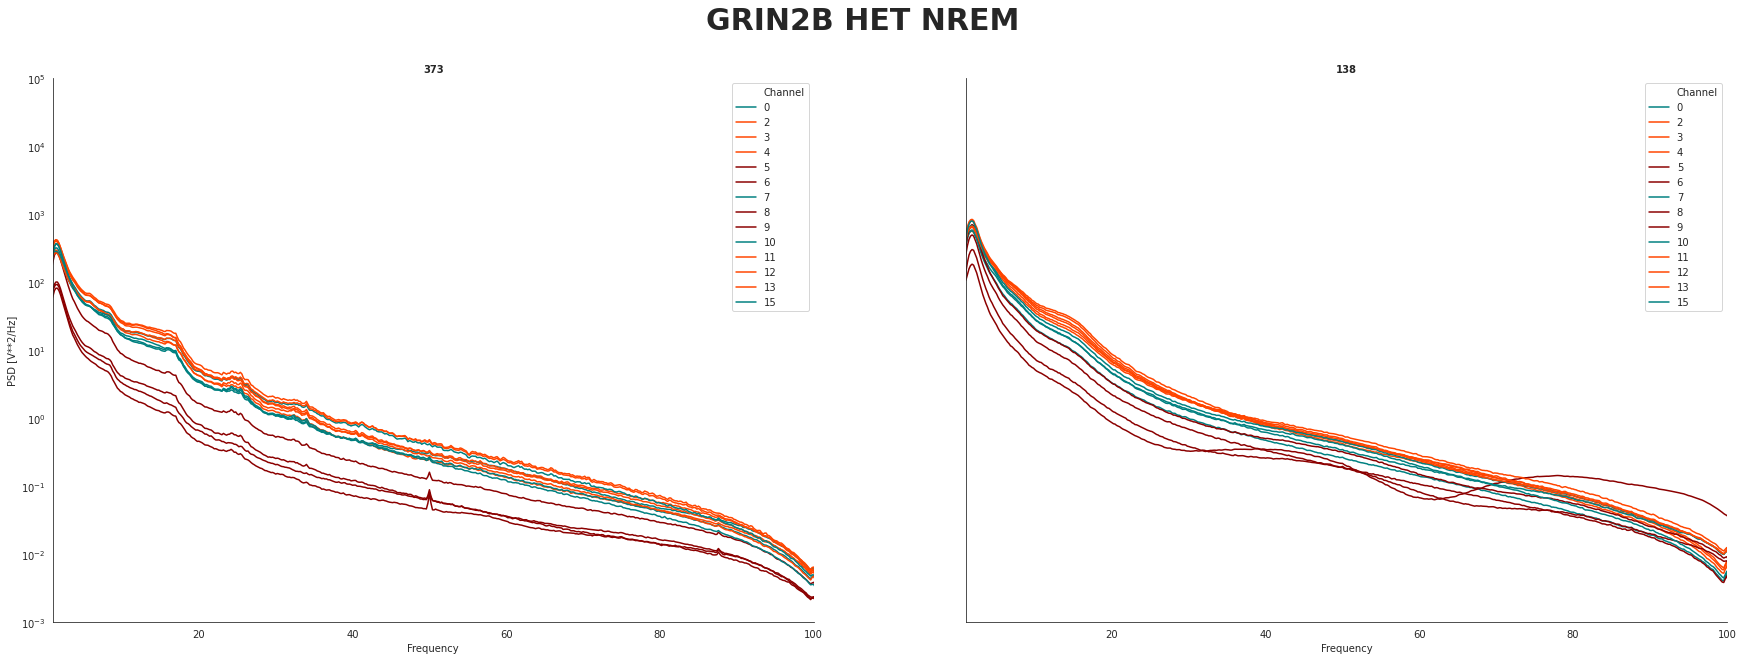

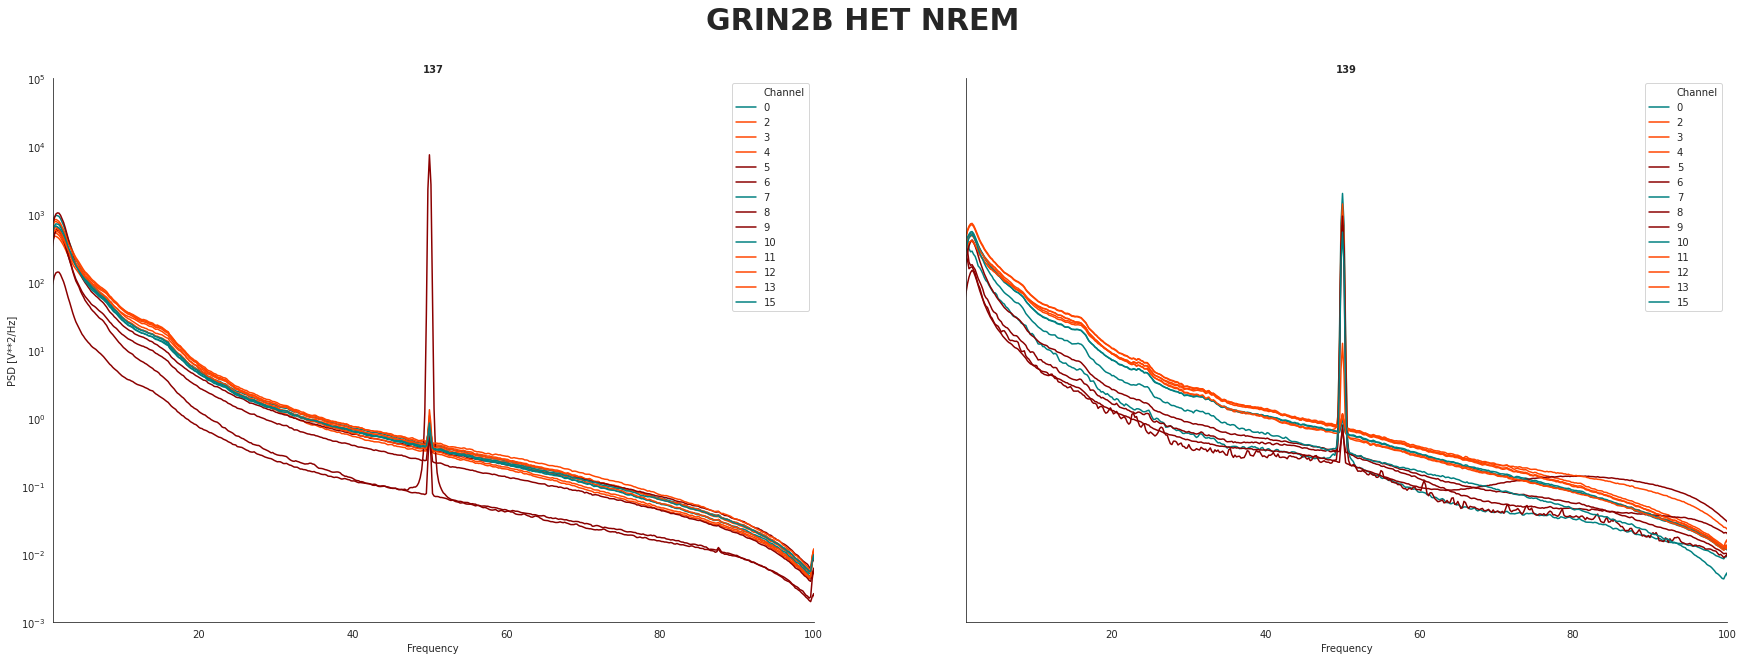

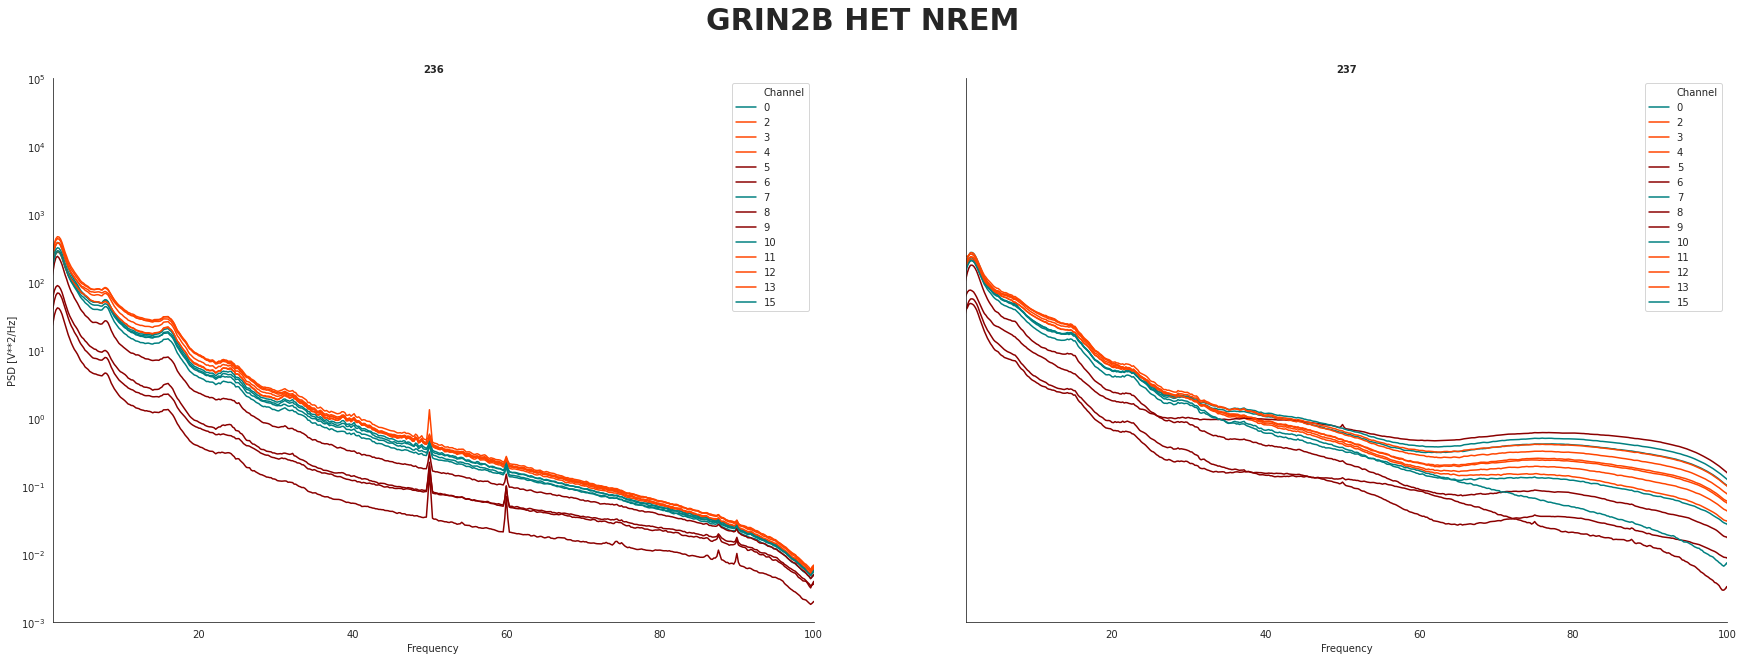

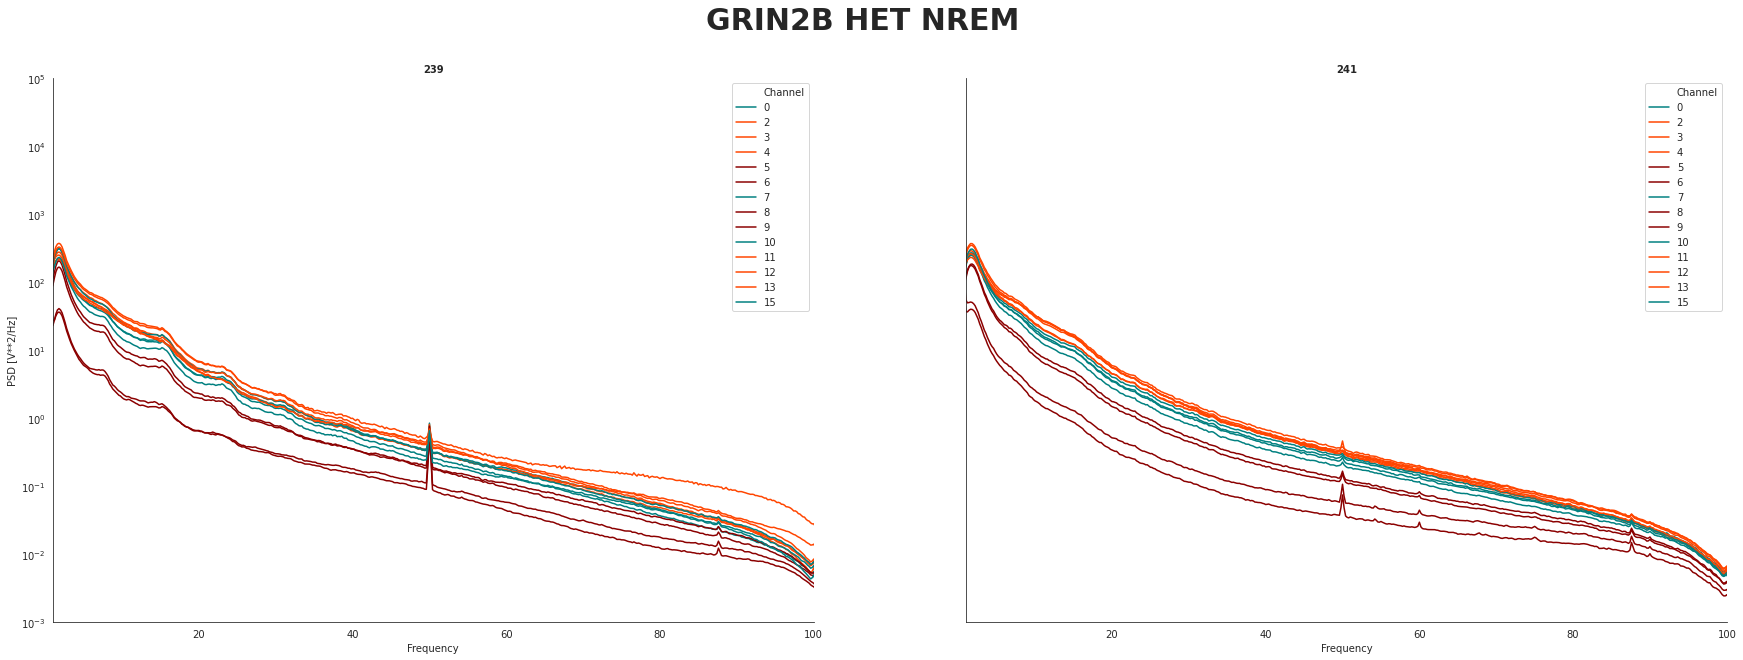

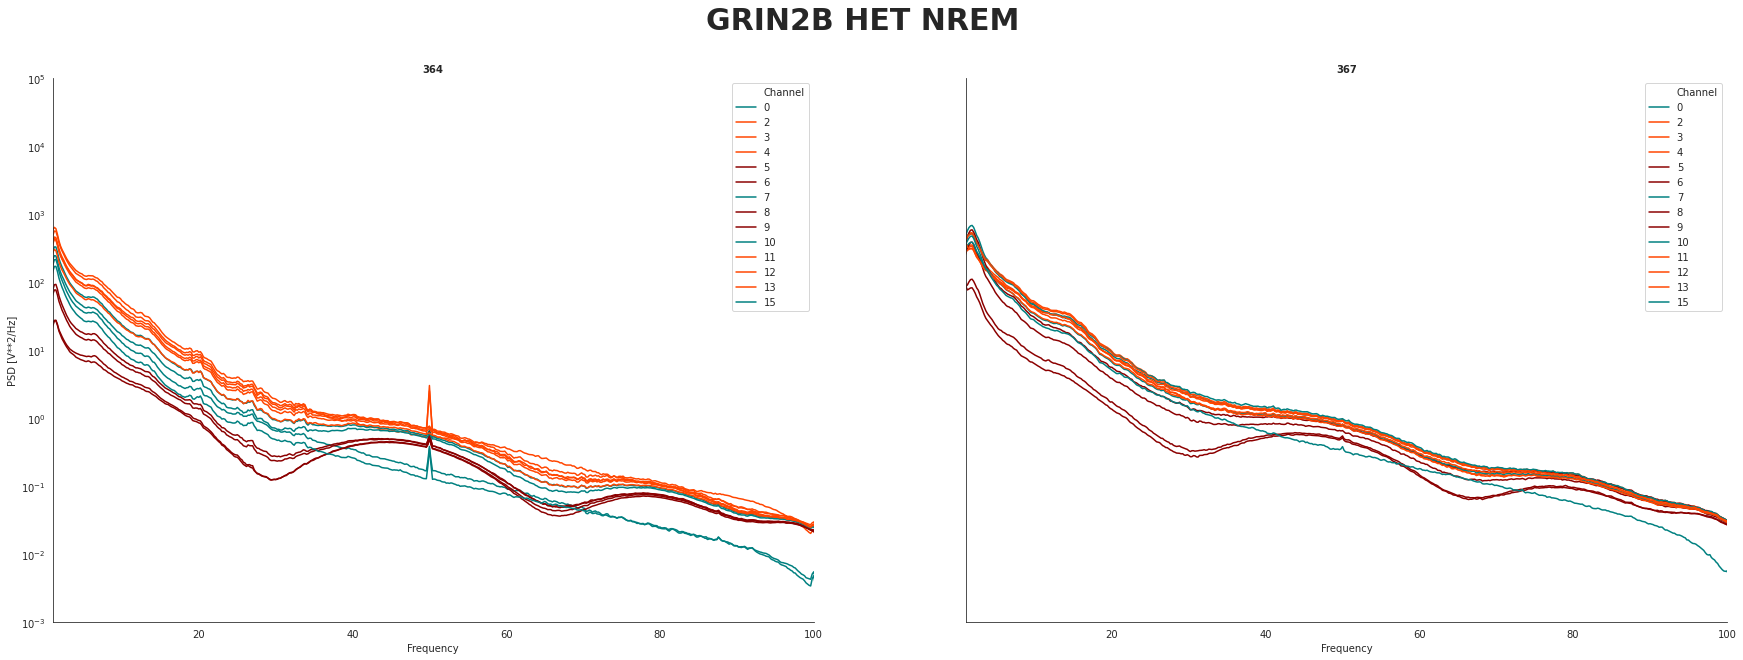

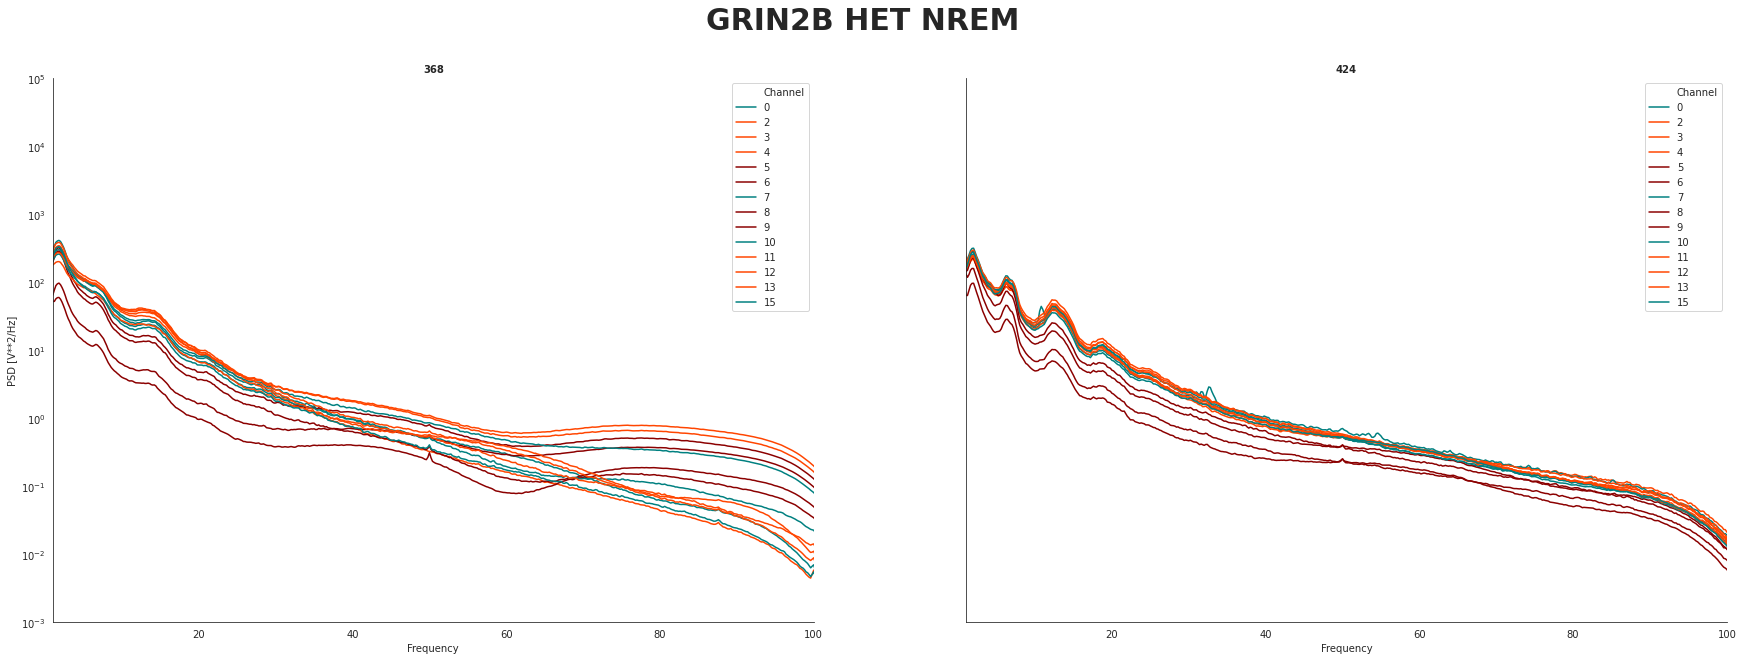

In [48]:
save_path = '/home/melissa/RESULTS/GRIN2B/Power/NREM'
plot_by_animal(non_rem, genotype = 'GRIN2B HET', sleepstage = 'NREM', save_path = save_path, plots_list = het_list_to_plot, plotting_palette = colors_dict )

# seizure IDs

In [121]:
os.chdir('/home/melissa/RESULTS/GRIN2B/wake_plots_excluding_seizures')
seizures = pd.read_csv('seizure_GRIN2B_power.csv')
seizures_WT = seizures[seizures['Genotype'] == 'WT']
seizures_het = seizures[seizures['Genotype'] == 'GRIN2B']

In [216]:
save_path = '/home/melissa/RESULTS/GRIN2B/seizures/excluded_animals'